# Scikit_image for RGB vs GRayscale

In [1]:
import cv2
from skimage import data, color
import numpy as np
from matplotlib import pyplot as plt

In [2]:
coffee_image = data.coffee()
coins_image = data.coins()

In [3]:
np.shape(coffee_image)

(400, 600, 3)

In [4]:
np.shape(coins_image)

(303, 384)

In [5]:
rocket = data.rocket()

In [6]:
gray_scaled_rocket = color.rgb2gray(rocket)

Text(0.5, 1.0, 'gray_scaled')

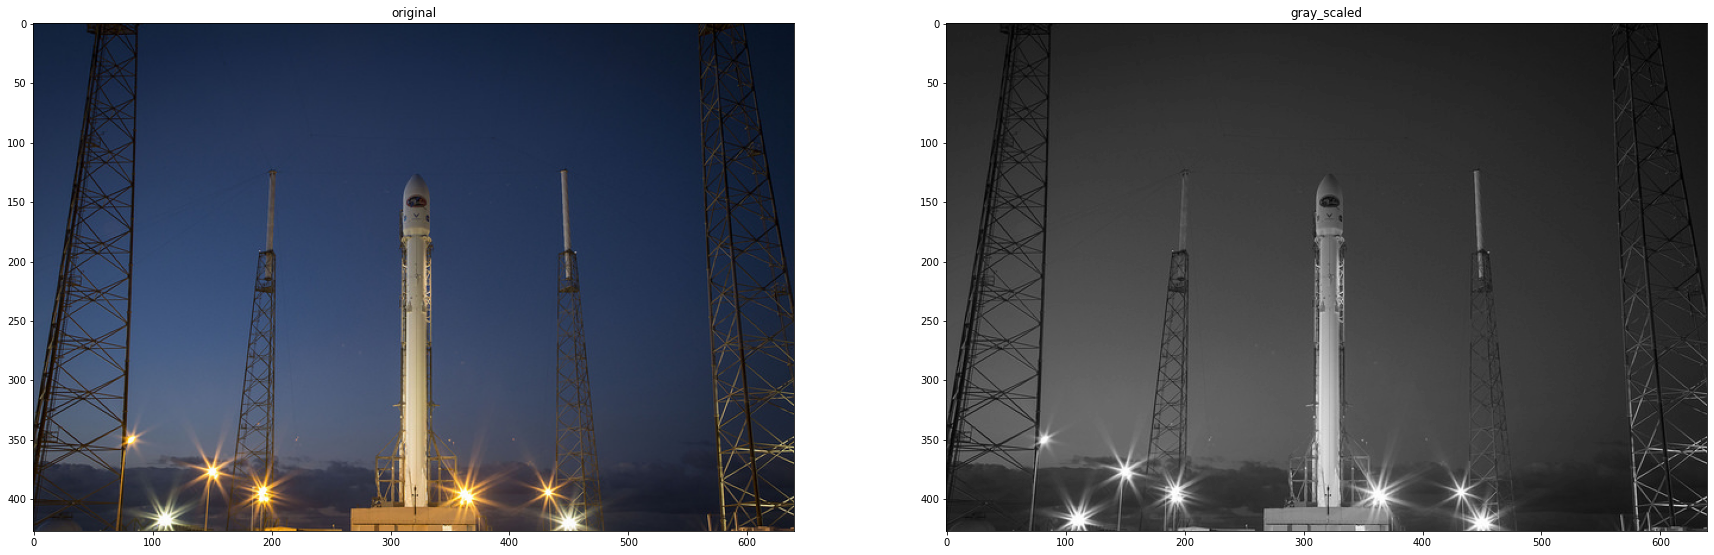

In [7]:
fig, ax = plt.subplots(1,2,figsize=(30,30))
ax[0].imshow(rocket, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(gray_scaled_rocket,cmap='gray')
ax[1].set_title('gray_scaled')

In [8]:
img = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\pic_test_2.jpg')

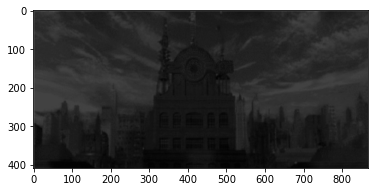

In [9]:
plt.imshow(img,cmap='gray')

In [10]:
type(img)

numpy.ndarray

# Numpy

In [11]:
red= rocket[:,:,0]
green= rocket[:,:,1]
blue= rocket[:,:,2]

In [12]:
#print(red, green, blue, sep=';')

Text(0.5, 1.0, 'original')

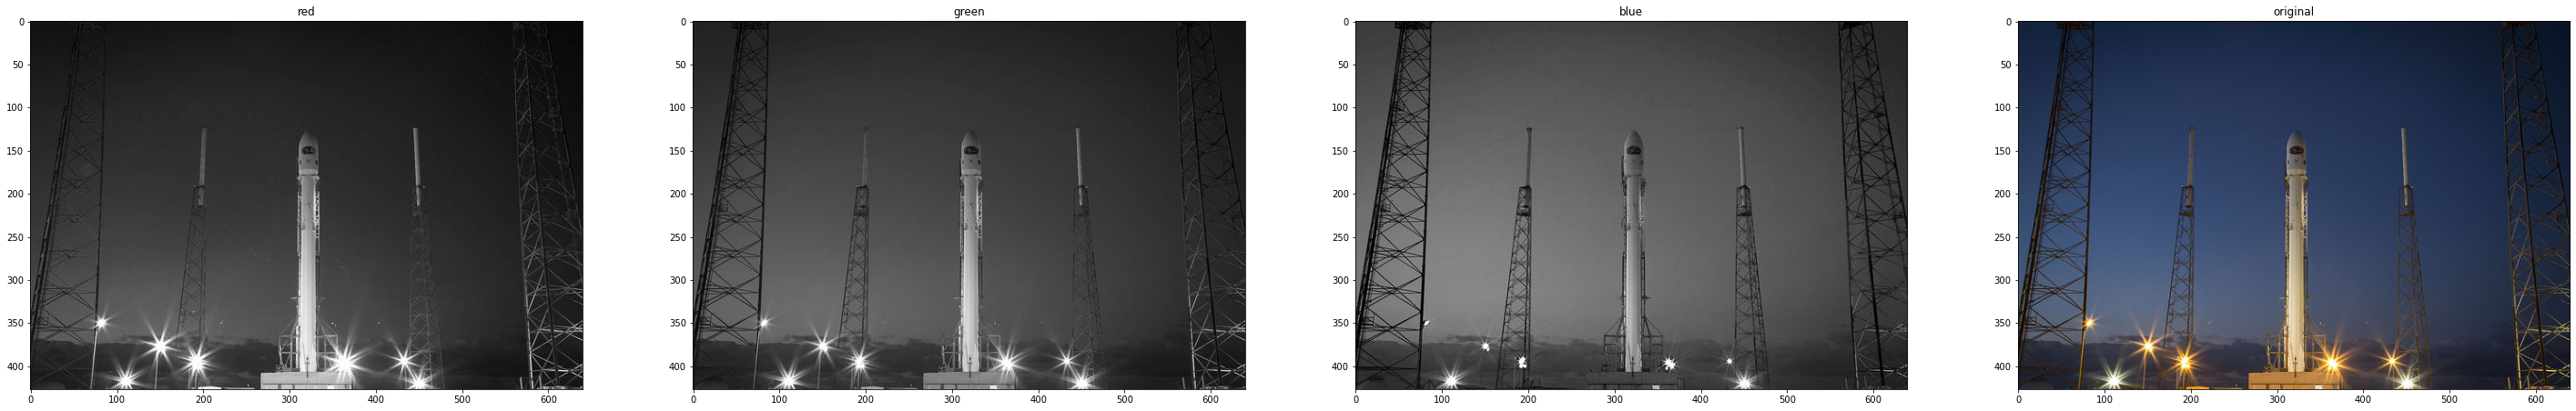

In [13]:
fig, ax = plt.subplots(1,4,figsize=(50,50))
ax[0].imshow(red, cmap='gray')
ax[0].set_title('red')
ax[1].imshow(green,cmap='gray')
ax[1].set_title('green')
ax[2].imshow(blue,cmap='gray')
ax[2].set_title('blue')
ax[3].imshow(rocket, cmap='gray')
ax[3].set_title('original')

In [14]:
rocket.shape

(427, 640, 3)

In [15]:
#Total number of pixels
rocket.size

819840

In [16]:
#flip in up direction
flipUd_rocket=np.flipud(rocket)

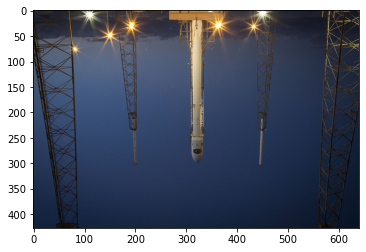

In [17]:
plt.imshow(flipUd_rocket)

In [18]:
#flip in left direction
flipLd_rocket = np.fliplr(rocket)

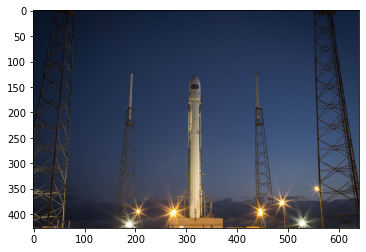

In [19]:
plt.imshow(flipLd_rocket)

### Histogram is the amount of pixels of each intensity value(0-255)

In [20]:
#Obtain the red histogram
plt.hist(red.ravel(), bins =256) 
#plt.hist(blue.ravel(), bins =256) 
#plt.hist(green.ravel(), bins =256) 
plt.show()

#bins = 256 is 0-255

# Thresholding - đặt ngưỡng
***Only from Grayscale image***

In [21]:
gray_scaled_rocket = color.rgb2gray(rocket)
#img = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\pic_test_2.jpg')

In [22]:
thresh = 100
binary = red <= thresh
#binary = red > thresh

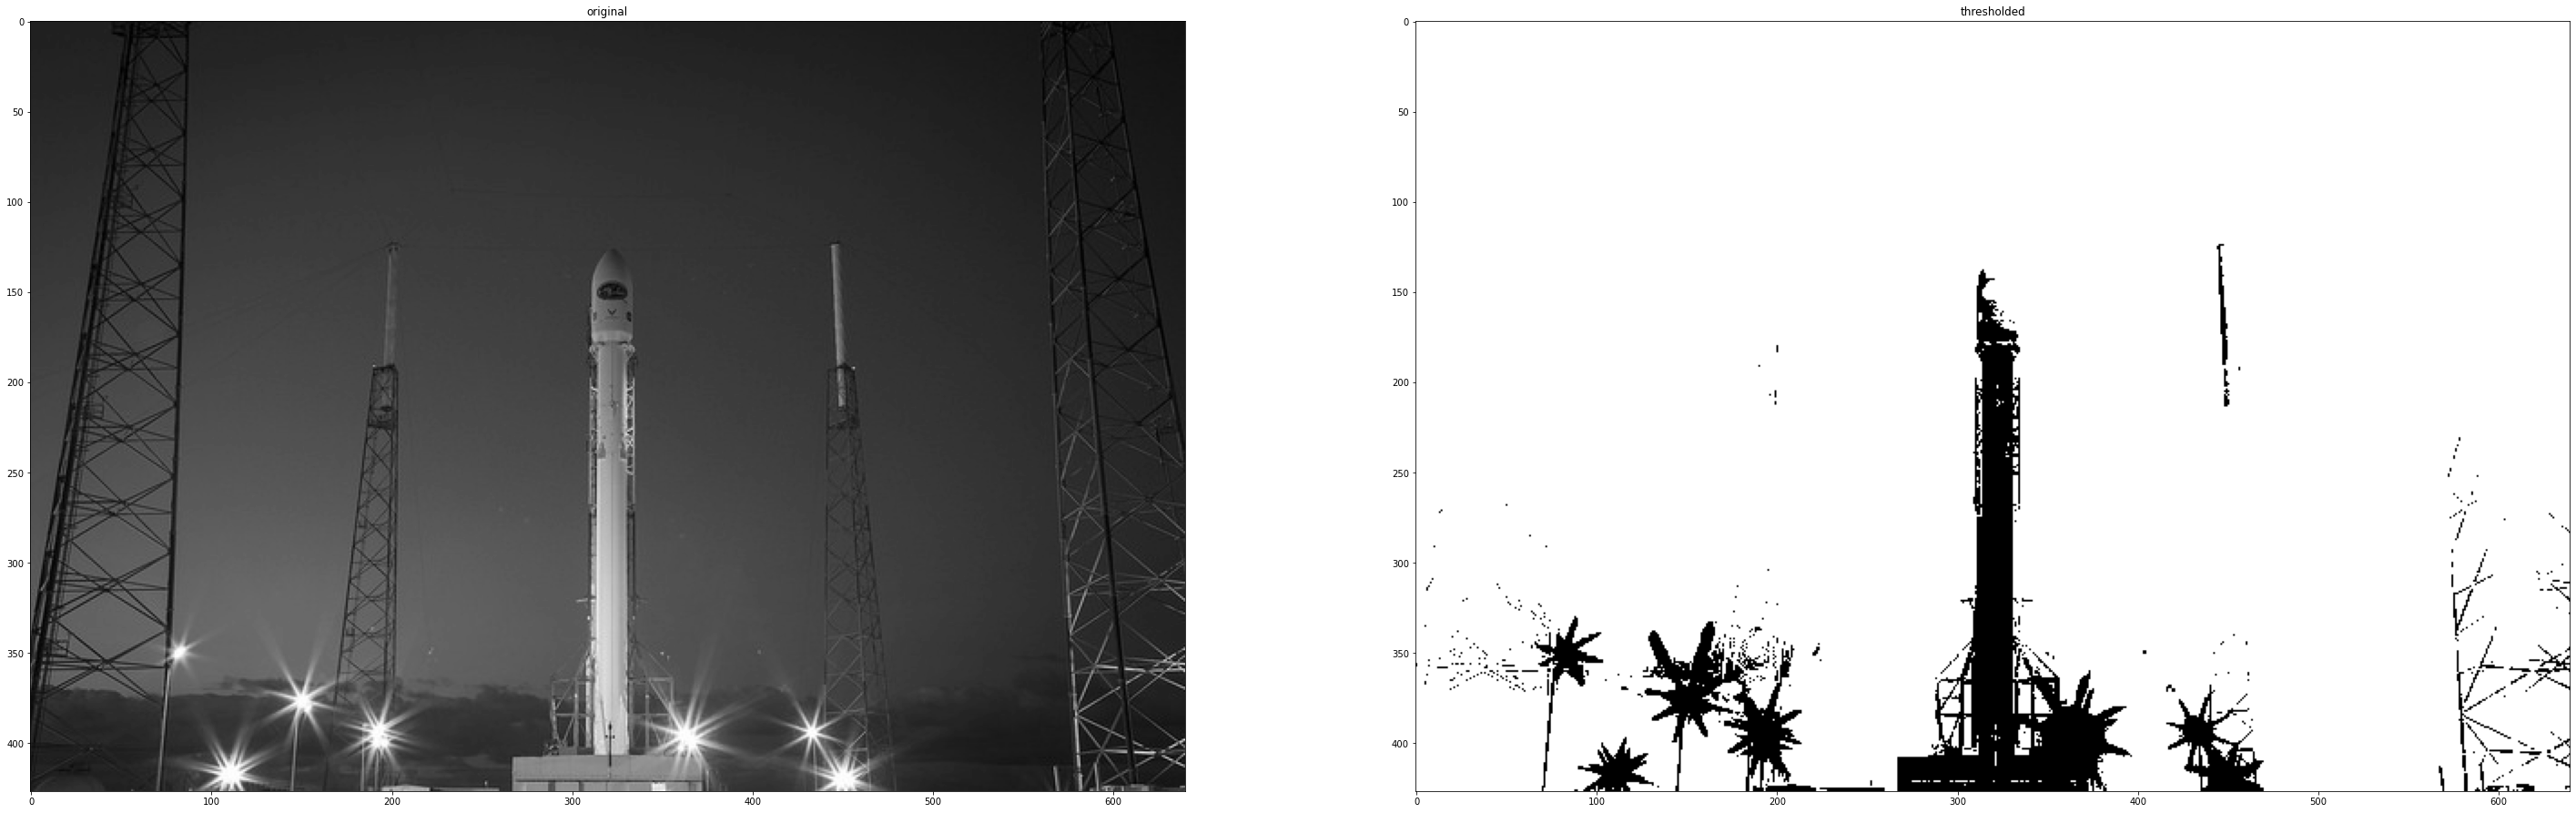

In [23]:
fig, ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(gray_scaled_rocket, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(binary,cmap='gray')
ax[1].set_title('thresholded')
plt.show()

**Global thresholding : good for uniform backgrounds**  
**Local thresholding : for uneven background illumination**

In [24]:
img = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test10.jpg',-1)
img = color.rgb2gray(img)

In [25]:
#some  thresholding algorithms
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(img, verbose = False)

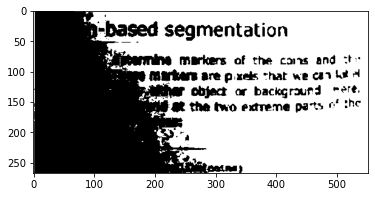

In [26]:
#global 
from skimage.filters import threshold_otsu

thresh = threshold_otsu(img)
binary_otsu = img > thresh

plt.imshow(binary_otsu, cmap='gray')

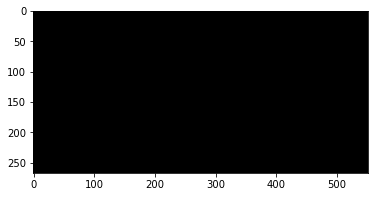

In [27]:
#local
from skimage.filters import threshold_local

block_size = 35 #be odd
local_thresh = threshold_local(img, block_size, offset =10)
binary_local = img < local_thresh

plt.imshow(binary_local, cmap='gray')

# Filters

In [28]:
img = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test8.jpg',-1)

In [29]:
#edge detection
#sobel
from skimage.filters import sobel

img_edge = sobel(img)

plt.imshow(img_edge, cmap='gray')

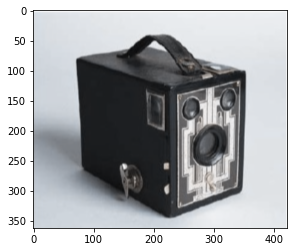

In [30]:
#Gaussian smothing

from skimage.filters import gaussian

img_gauss = gaussian(img, channel_axis = True) # old version for multichannel for RGB picture

plt.imshow(img_gauss, cmap='gray')

# Contrast enhancement

***The contrast is the different between max (255) and min (0) pixel intensity***  
=> Low contrast is small different between dark and light pixel value

In [31]:
#np.max(img)
np.min(img)

0

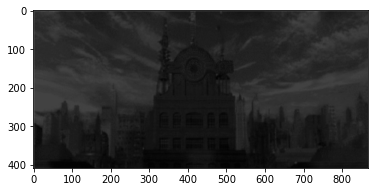

In [32]:
img = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\pic_test_2.jpg',-1)
plt.imshow(img, cmap='gray')

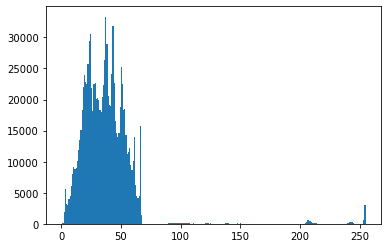

In [33]:
plt.hist(img.ravel(), bins =256)
plt.show()

#### Enhance contrast including some types:  

#Contrast Stretching  
#Histogram equalization: Standard & Adaptive & Limited Adaptive (CLAHE)

F:\anaconda1\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


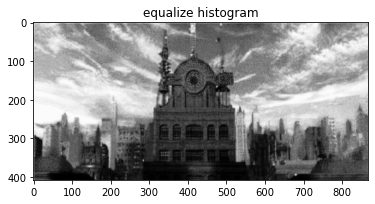

In [34]:
#histogram equalization

from skimage import exposure

img_eq = exposure.equalize_hist(img)

plt.imshow(img_eq, cmap='gray')
plt.title('equalize histogram')
plt.show()

In [35]:
plt.hist(img_eq.ravel(), bins =256)
plt.show()

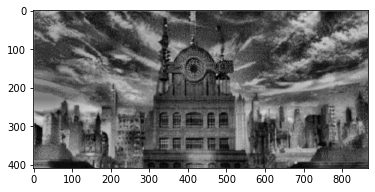

In [36]:
#CLAHE

img_ae= exposure.equalize_adapthist(img, clip_limit = 0.03)
#clip_limit in a range(0,1), higher => more contrast

plt.imshow(img_ae)

In [37]:
plt.hist(img_ae.ravel(), bins =256)
plt.show()

# Transformation

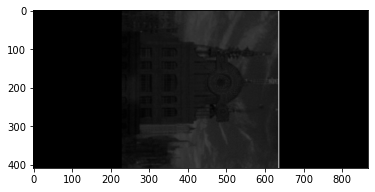

In [38]:
#Rotating
from skimage.transform import rotate

# +90 for left
img_rt = rotate(img, -90) #right
plt.imshow(img_rt)

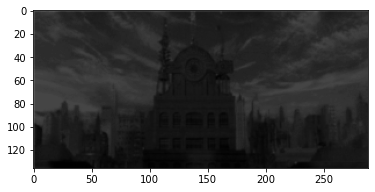

In [39]:
# Rescaling
from skimage.transform import rescale

img_rs= rescale(img, 1/3, anti_aliasing =True)
#anti aliasing is smothing problem in edge
plt.imshow(img_rs, cmap='gray')
plt.show()

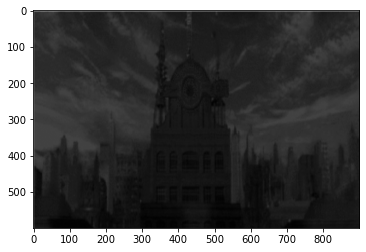

In [40]:
#Resizing
from skimage.transform import resize

height = 600
width = 900

img_rs= resize(img, (height, width), anti_aliasing = True)
plt.imshow(img_rs, cmap='gray')

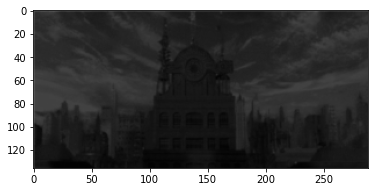

In [41]:
#Resizing proportionally : thay doi kich thuoc theo ty le

height1 = img.shape[0]/3
width1 = img.shape[1]/3

img_rp= resize(img, (height1, width1), anti_aliasing = True)
plt.imshow(img_rp, cmap='gray')

# Morphological filter  
***lọc hình thái***

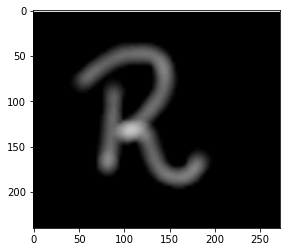

In [42]:
img = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test11.jpg')
plt.imshow(img,cmap='gray')
gray_img = color.rgb2gray(img)

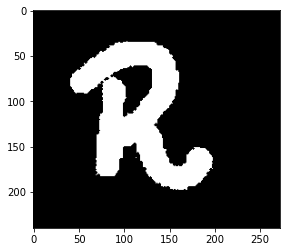

In [43]:
# Import the morphology module
from skimage import morphology

# Binary erosion with default selem
eroded_image_shape = morphology.binary_erosion(gray_img) 

plt.imshow(eroded_image_shape, cmap='gray')
plt.show()

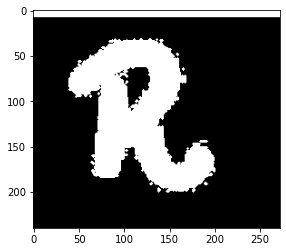

In [44]:
#Dilation  "like a little expand"
dilated_image_shape = morphology.binary_dilation(gray_img) 

plt.imshow(dilated_image_shape, cmap='gray')
plt.show()

# Image restoration

In [45]:
img = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test12.jpg',-1)
plt.imshow(img, cmap='gray')

In [46]:
img.shape #height width RGB

(370, 642, 3)

C:\Users\nguye\AppData\Local\Temp\ipykernel_6640\1663307356.py:11: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed = inpaint.inpaint_biharmonic(img,mask, multichannel = True)


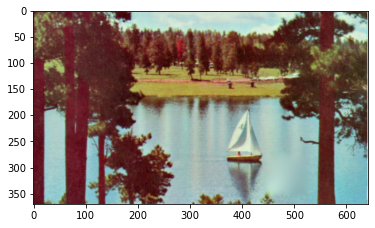

In [47]:
#remove logo

from skimage.restoration import inpaint
# Initialize the mask
mask = np.zeros(img.shape[:-1])

# Set the pixels where the logo is to 1
mask[270:355, 445:530] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(img,mask, multichannel = True)

# Show the original and logo removed images
plt.imshow(image_logo_removed, cmap='gray')

In [48]:
image_logo_removed[180:290, 360:450] = 0

In [49]:
plt.imshow(image_logo_removed, cmap='gray')

In [50]:
#create mask
mask[175:340, 360:450] = 1

In [51]:
# Apply inpainting to remove the logo
image_reconstructed = inpaint.inpaint_biharmonic(image_logo_removed, mask, multichannel = True)

# Show the original and logo removed images
plt.imshow(image_reconstructed, cmap='gray')

C:\Users\nguye\AppData\Local\Temp\ipykernel_6640\158042188.py:2: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_reconstructed = inpaint.inpaint_biharmonic(image_logo_removed, mask, multichannel = True)


# Noise

In [52]:
from skimage.util import random_noise

In [53]:
img = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test8.jpg',-1)
#img2= plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test.jpg',-1)
img = color.rgb2gray(img)
#plt.imshow(img, cmap='gray')

In [54]:
#Add noise
noisy_img = random_noise(img)

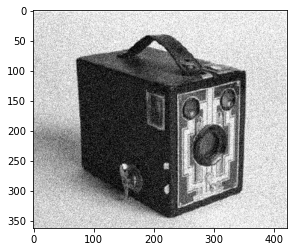

In [55]:
plt.imshow(noisy_img , cmap='gray')

**Some denoising types** : Total variation, Bilateral

In [56]:
#total variation
from skimage.restoration import denoise_tv_chambolle

#denoised_image= denoise_tv_chambolle(img2, weight = 0.3, channel_axis = True)
denoised_image= denoise_tv_chambolle(noisy_img, weight = 0.1, channel_axis = True)

In [57]:
plt.imshow(denoised_image, cmap='gray')

In [58]:
#Bilateral filter
from skimage.restoration import denoise_bilateral

denoised_image_bil= denoise_bilateral(noisy_img)

In [59]:
plt.imshow(denoised_image_bil, cmap='gray')

In [60]:
img2= plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test.jpg',-1)
img2 = color.rgb2gray(img2)
denoised_image= denoise_tv_chambolle(img2, weight = 0.3, channel_axis = True)
denoised_image_bil= denoise_bilateral(img2)
fig, ax = plt.subplots(1,3,figsize=(30,30))
ax[0].imshow(denoised_image, cmap='gray')
ax[0].set_title('total variation filter')
ax[1].imshow(denoised_image_bil, cmap='gray')
ax[1].set_title('bilateral filter')
ax[2].imshow(img2, cmap='gray')
ax[2].set_title('original')

Text(0.5, 1.0, 'original')

# Segments  
phân đoạn

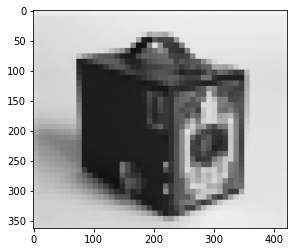

In [61]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 2000 regions
segments = slic(img, n_segments= 2000)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, img, kind='avg')

# Show the segmented image
plt.imshow(segmented_image, cmap='gray')

# Contours  
đường viền

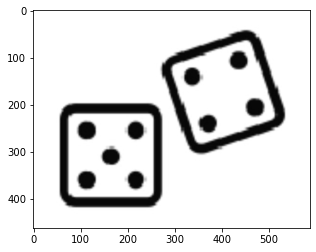

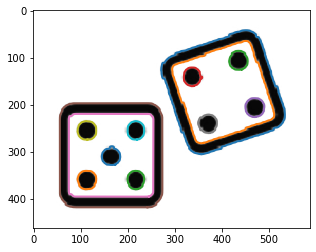

In [102]:
# Import the modules
from skimage import measure, data

# load image
img2= plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test14.jpg')
img2= color.rgb2gray(img2)
plt.imshow(img2, cmap='gray')
# Find the contours with a constant level value of 0.8 => càng gần 1 thì càng chính xác hơn
contours = measure.find_contours(img2, 0.8)

# Shows the image with contours found
fig, ax = plt.subplots()
ax.imshow(img2, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

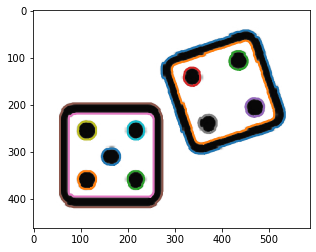

In [103]:
from skimage.filters import threshold_otsu

img2= plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test14.jpg')
img2= color.rgb2gray(img2)


# Obtain the optimal thresh value
thresh = threshold_otsu(img2)

# Apply thresholding
binary = img2 > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
fig, ax = plt.subplots()
ax.imshow(img2, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [104]:
#count the dots

# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 100 as the maximum size of the dots shape
max_dots_shape = 180

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

Dice's dots number: 9. 


# Finding edge with canny

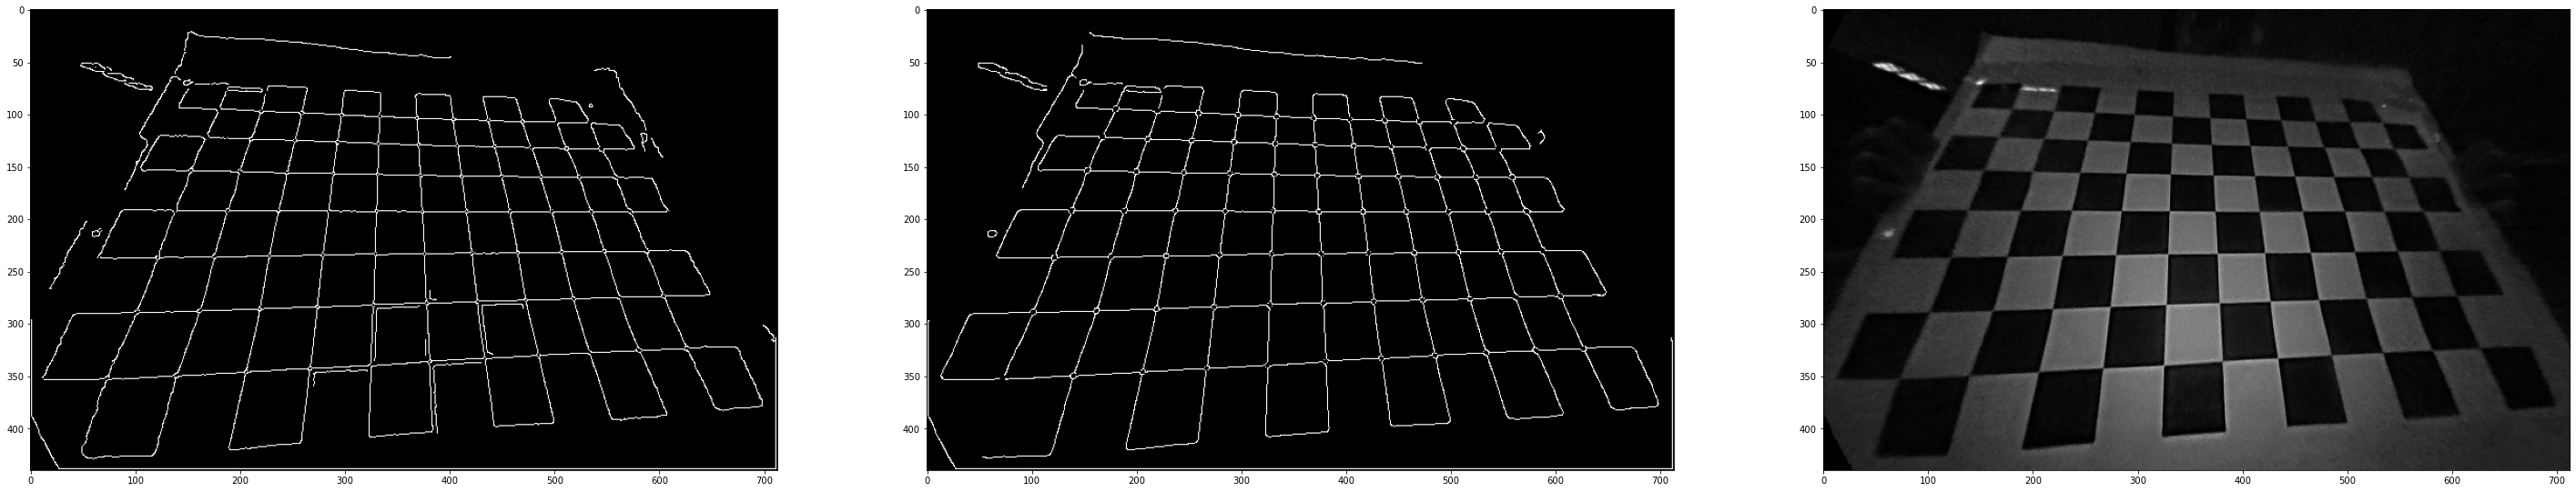

In [105]:
# Canny edge detection woth Canny

#the less sigma value the less gaussian filter effect => more edge

img_sq= plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test_sq.png')
img2_sq= color.rgb2gray(img_sq)

from skimage.feature import canny

#Apply canny detector
canny_edges_1= canny(img2_sq) #default sigma =1
canny_edges_5= canny(img2_sq, sigma= 2.0) #0.5
#show result
fig, ax = plt.subplots(1,3,figsize=(50,50))
ax[0].imshow(canny_edges_1, cmap='gray')
ax[1].imshow(canny_edges_5, cmap='gray')
ax[2].imshow(img2_sq, cmap='gray')
plt.show()

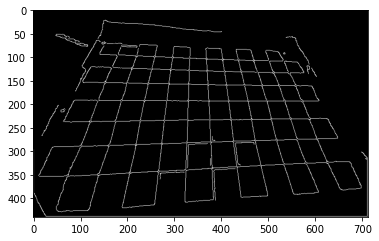

In [118]:
thresh = threshold_otsu(canny_edges_1)
binary_otsu = canny_edges_1 > thresh
plt.imshow(binary_otsu)

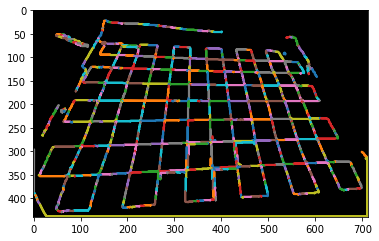

In [124]:
contours = measure.find_contours(binary_otsu, 0.8)
# Shows the image with contours found
fig, ax = plt.subplots()
ax.imshow(binary_otsu, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

C:\Users\nguye\AppData\Local\Temp\ipykernel_6640\4235092885.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


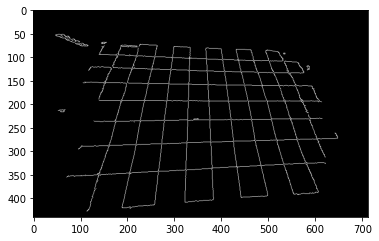

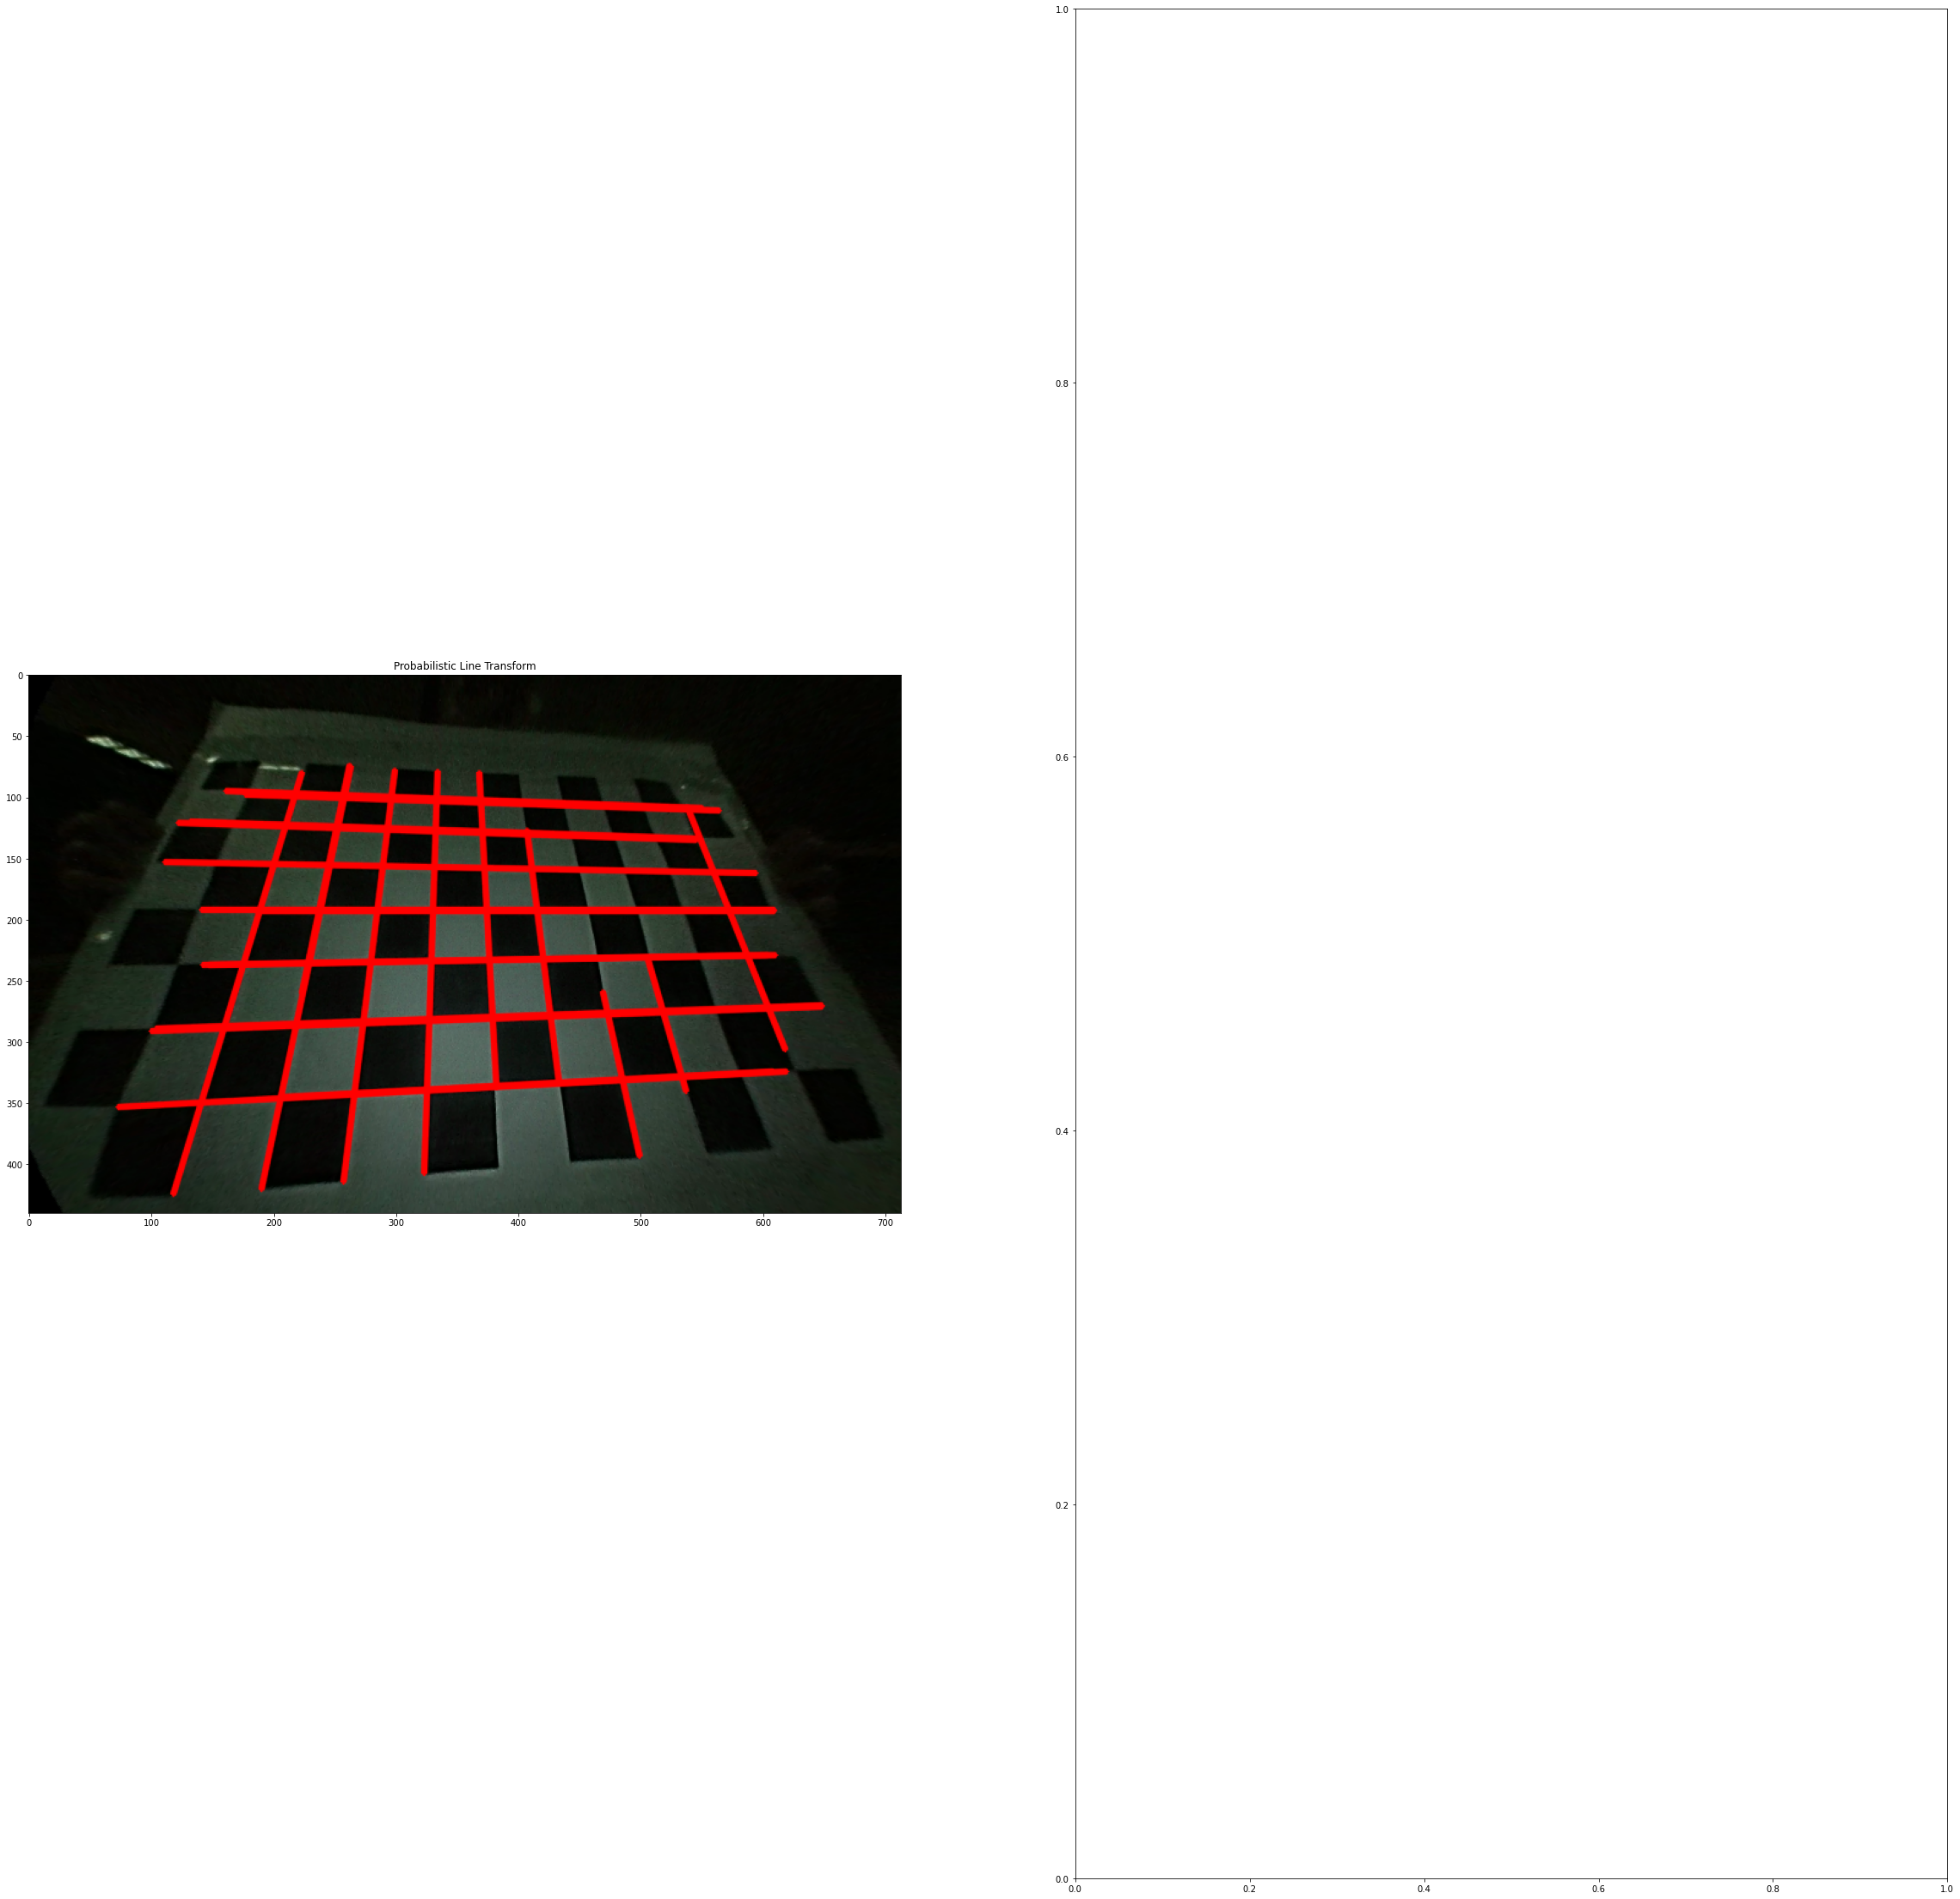

In [143]:

import math
# Read image
src = cv2.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test_sq.png', cv2.IMREAD_COLOR)

# Convert to grayscale image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Use Canny to find edges
edges = cv2.Canny(gray, 50, 200, None, 3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)
plt.imshow(edges, cmap='gray')
cdst = src.copy()
cdstP = src.copy()

lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, None, 90, 60)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

# f, axarr = plt.subplots(1,2,figsize=(20, 20))
# [axi.set_axis_off() for axi in axarr.ravel()]
# axarr[0].imshow(cv.cvtColor(cdst, cv.COLOR_BGR2RGB))
# axarr[0].set_title("Standard Hough Line Transform")
# axarr[1].imshow(cv.cvtColor(cdstP, cv.COLOR_BGR2RGB))
# axarr[1].set_title("Probabilistic Line Transform")
# f.show()


f, axarr = plt.subplots(1,2,figsize=(40, 40))
axarr[0].imshow(cv2.cvtColor(cdstP, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Probabilistic Line Transform")
f.show()

# Harris Coner detection
an intersection of 2 edges

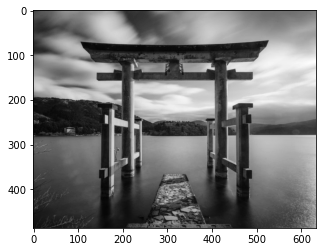

In [66]:
img_cn= plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\test15.jpg')
img_cn1= color.rgb2gray(img_cn)
plt.imshow(img_cn1, cmap='gray')

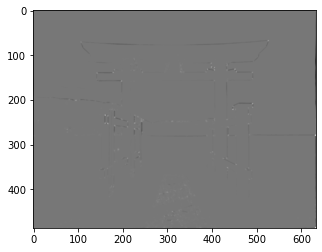

In [67]:
from skimage.feature import corner_harris, corner_peaks

#Apply harris corner detector
img_cn_hr = corner_harris(img_cn1)

plt.imshow(img_cn_hr, cmap='gray')

In [68]:
#find the coordinates of the corners
coords = corner_peaks(img_cn_hr, min_distance =5,threshold_rel=0.02)
#coords = corner_peaks(img_cn_hr, min_distance =10)
sum_corners= len(coords)

In [69]:
sum_corners

175

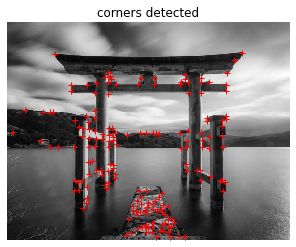

In [70]:
plt.imshow(img_cn1, interpolation='nearest', cmap='gray')
plt.title('corners detected')
plt.plot(coords[:,1], coords[:,0], '+r')
plt.axis('off')
plt.show()

# Face detection

In [71]:
img_face= plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\pic_test1.jpg')
#img_face= plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\pic_test1.jpg')

from skimage.feature import Cascade
from matplotlib.patches import Rectangle
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = img_face,
                                       scale_factor=1.2, #scale until fit with face
                                       step_ratio=1, 
                                       min_size=(10,10),
                                       max_size=(200,200))
#step_ratio higher value => worse but fast and between 1 1.5 for good results 
# Show the detected faces
fig, ax = plt.subplots()
plt.imshow(img_face)
img_desc = plt.gca()
plt.set_cmap('gray')
for patch in detected:
    img_desc.add_patch(Rectangle((patch['c'], patch['r']),
                        patch['width'], patch['height'], fill = False, 
                                         color ='r', linewidth =2)
                      )
plt.show()

# Privacy pretection

In [72]:
def getFace(d, image):
# Extracts the face rectangle from the image using the
#coordinates of the detected.
# X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
# The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
# Extract the detected face
    face= image[x:width, y:height]
    return face

In [73]:
def mergeBlurryFace(original, gaussian_image):
# X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
# The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    original[ x:width, y:height] = gaussian_image
    return original

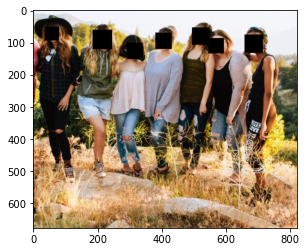

In [74]:
#for each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFace(d,img_face)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, channel_axis= True)

    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(img_face, blurred_face) 
plt.imshow(resulting_image)